In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("food_price.csv")

In [3]:
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [4]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [5]:
df["ProductName"].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

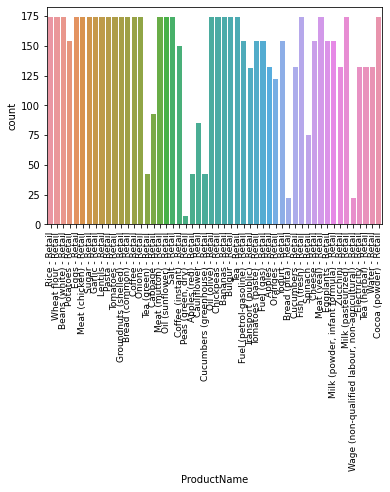

In [7]:
sns.countplot(x=df.ProductName, data=df)
plt.xticks(rotation=90, size =9);

In [8]:
numerical_columns = df.select_dtypes(include=['number'])

# Yeni DataFrame oluşturma
new_df = pd.DataFrame(numerical_columns)

In [9]:
new_df

,ProductId,UmId,Month,Year,Price
0,52,5,5,2013,4.4920
1,52,5,6,2013,4.5786
2,52,5,11,2013,4.7865
3,52,5,12,2013,5.1337
4,52,5,1,2014,5.5099
...,...,...,...,...,...
7376,502,5,8,2019,47.9040
7377,502,5,9,2019,49.1176
7378,502,5,10,2019,50.8347
7379,502,5,11,2019,51.7985


In [10]:
#aykiri gozlem

In [11]:
from sklearn.neighbors import LocalOutlierFactor

In [12]:
clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.1)

In [13]:
outlier_scores = clf.fit_predict(new_df)

In [14]:
outlier_scores

array([-1, -1, -1, ...,  1,  1,  1])

In [15]:
df_scores = clf.negative_outlier_factor_
print(df_scores)

[-1.3677007  -1.33786433 -1.33384133 ... -0.97911507 -1.00595193
 -0.99365418]


In [16]:
import numpy as np
esik_deger = np.sort(df_scores)[14]

In [17]:
aykiri_tf = df_scores > esik_deger
print(aykiri_tf)

[ True  True  True ...  True  True  True]


In [18]:
dff = df[df_scores > esik_deger]
dff

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [19]:
kore = df.corr()
kore

,ProductId,UmId,Month,Year,Price
ProductId,1.000000,0.375702,-0.000581,0.106983,0.238242
UmId,0.375702,1.000000,0.004500,0.095413,0.090992
Month,-0.000581,0.004500,1.000000,-0.042188,0.029675
Year,0.106983,0.095413,-0.042188,1.000000,0.114856
Price,0.238242,0.090992,0.029675,0.114856,1.000000


In [20]:
#Eksik Veri

In [21]:
dff.isnull().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [22]:
#One-Hot

In [23]:
dff = pd.get_dummies(dff)
dff.columns

Index(['ProductId', 'UmId', 'Month', 'Year', 'Price', 'Place_Ankara',
       'Place_Istanbul', 'Place_Izmir', 'Place_National Average',
       'ProductName_Apples (red) - Retail', 'ProductName_Apples - Retail',
       'ProductName_Bananas - Retail', 'ProductName_Beans (white) - Retail',
       'ProductName_Bread (common) - Retail',
       'ProductName_Bread (pita) - Retail', 'ProductName_Bulgur - Retail',
       'ProductName_Cabbage - Retail', 'ProductName_Cauliflower - Retail',
       'ProductName_Cheese - Retail', 'ProductName_Chickpeas - Retail',
       'ProductName_Cocoa (powder) - Retail',
       'ProductName_Coffee (instant) - Retail', 'ProductName_Coffee - Retail',
       'ProductName_Cucumbers (greenhouse) - Retail',
       'ProductName_Cucumbers - Retail', 'ProductName_Eggplants - Retail',
       'ProductName_Eggs - Retail', 'ProductName_Electricity - Retail',
       'ProductName_Fish (fresh) - Retail', 'ProductName_Fuel (gas) - Retail',
       'ProductName_Fuel (petrol-gasoli

In [24]:
dff.drop(columns= ['Place_National Average','ProductName_Apples (red) - Retail','UmName_12 KG'], inplace=True)

In [25]:
dff

,ProductId,UmId,Month,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,ProductName_Apples - Retail,ProductName_Bananas - Retail,...,ProductName_Yogurt - Retail,ProductName_Zucchini - Retail,UmName_Course,UmName_Cubic meter,UmName_Day,UmName_KG,UmName_L,UmName_Package,UmName_Unit,UmName_kWh
0,52,5,5,2013,4.4920,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,52,5,6,2013,4.5786,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,52,5,11,2013,4.7865,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,52,5,12,2013,5.1337,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52,5,1,2014,5.5099,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,502,5,8,2019,47.9040,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7377,502,5,9,2019,49.1176,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7378,502,5,10,2019,50.8347,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7379,502,5,11,2019,51.7985,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
dff.drop(['ProductId', 'UmId',  'Month', 'Year'],axis=1, inplace=True)

In [27]:
dff

,Price,Place_Ankara,Place_Istanbul,Place_Izmir,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,ProductName_Bread (common) - Retail,ProductName_Bread (pita) - Retail,ProductName_Bulgur - Retail,...,ProductName_Yogurt - Retail,ProductName_Zucchini - Retail,UmName_Course,UmName_Cubic meter,UmName_Day,UmName_KG,UmName_L,UmName_Package,UmName_Unit,UmName_kWh
0,4.4920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4.5786,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7865,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.1337,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5.5099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,47.9040,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7377,49.1176,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7378,50.8347,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7379,51.7985,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [29]:
X=dff.drop("Price",axis=1)
y=dff["Price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(5892, 61)

In [32]:
y_train.shape

(5892,)

In [33]:
X_test.shape

(1474, 61)

In [34]:
y_test.shape

(1474,)

In [73]:
#ALGORITHMS

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [75]:
#model tuning
lamb = 10**np.linspace(10,-2,100)*5
model = RidgeCV(alphas = lamb, scoring="neg_mean_squared_error")
model.fit(X_train,y_train)
print("{:.2f}".format(model.alpha_))

model_lasso = LassoCV(cv=10, max_iter=10000)
model_lasso.fit(X_train, y_train)
print(model_lasso.alpha_)

model_enet = ElasticNetCV(cv=10)
model_enet.fit(X_train,y_train)
print(model_enet.alpha_)

0.05
0.0019822533107043553
0.0039645066214087105


In [76]:
lm = LinearRegression()
rd = Ridge(alpha = model.alpha_)
ls = Lasso(alpha = model_lasso.alpha_)
net = ElasticNet(alpha = model_enet.alpha_)
xgb = xg.XGBRegressor()

In [77]:
classifiers = [("Linear regression",lm),
              ("Ridge regression", rd),
              ("Lasso regression", ls),
              ("ElasticNet regressin", net),
              ("Xgboost", xgb)]

In [78]:
for i_name, i in classifiers:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print("RMSE = {:s} : {:.3f}".format(i_name, np.sqrt(MSE(y_test, y_pred))))
    print("R2 SCORE = {:s} : {:.3f}".format(i_name, r2_score(y_test, y_pred)))

RMSE = Linear regression : 5.166
R2 SCORE = Linear regression : 0.944
RMSE = Ridge regression : 5.168
R2 SCORE = Ridge regression : 0.944
RMSE = Lasso regression : 5.170
R2 SCORE = Lasso regression : 0.944
RMSE = ElasticNet regressin : 5.554
R2 SCORE = ElasticNet regressin : 0.935
RMSE = Xgboost : 4.681
R2 SCORE = Xgboost : 0.954


In [79]:
for i_name, i in classifiers:
    model = i.fit(X_train,y_train)
    rmse_cv_train = np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")).mean()
    rmse_cv_test = np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring = "neg_mean_squared_error")).mean()
    print("cv_train = {:s} : {:.2f}".format(i_name, rmse_cv_train))
    print("cv_test = {:s} : {:.2f}".format(i_name, rmse_cv_test))

cv_train = Linear regression : 5.43
cv_test = Linear regression : 5.21
cv_train = Ridge regression : 5.43
cv_test = Ridge regression : 5.20
cv_train = Lasso regression : 5.43
cv_test = Lasso regression : 5.20
cv_train = ElasticNet regressin : 5.79
cv_test = ElasticNet regressin : 5.59
cv_train = Xgboost : 5.13
cv_test = Xgboost : 5.20
